# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [1]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/)

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK 1513 ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK 1513 ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
from string import punctuation

In [4]:
myStopWords = list(punctuation) + stopwords.words('english')
# print(myStopWords)

sia = vader.SentimentIntensityAnalyzer()


## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [5]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [6]:
macbeth_sent = sent_tokenize(macbeth_string)
macbeth_words = []
for s in macbeth_sent:
    for w in word_tokenize(s):
        macbeth_words.append(w)

print(macbeth_words)
# print(word_tokenize(macbeth_string))

['cover', 'macbeth', 'by', 'william', 'shakespeare', 'contents', 'act', 'i', 'scene', 'i.', 'an', 'open', 'place', '.', 'scene', 'ii', '.', 'a', 'camp', 'near', 'forres', '.', 'scene', 'iii', '.', 'a', 'heath', '.', 'scene', 'iv', '.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'v.', 'inverness', '.', 'a', 'room', 'in', 'macbethâ\x80\x99s', 'castle', '.', 'scene', 'vi', '.', 'the', 'same', '.', 'before', 'the', 'castle', '.', 'scene', 'vii', '.', 'the', 'same', '.', 'a', 'lobby', 'in', 'the', 'castle', '.', 'act', 'ii', 'scene', 'i.', 'inverness', '.', 'court', 'within', 'the', 'castle', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'scene', 'iv', '.', 'the', 'same', '.', 'without', 'the', 'castle', '.', 'act', 'iii', 'scene', 'i.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'another', 'room', 'in', 'the', 'palace', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'a', 'park'

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * If the compound score is 0, the word should not be added to either list

In [7]:
pos_words = []
neg_words = []

for w in macbeth_words:
  if sia.polarity_scores(w)['compound'] > 0:
    pos_words.append(w)
  elif sia.polarity_scores(w)['compound'] < 0:
    neg_words.append(w)

print(pos_words)
print(neg_words)

['lobby', 'play', 'won', 'fair', 'fair', 'like', 'good', 'hardy', 'brave', 'friend', 'worthy', 'smiling', 'like', 'brave', 'well', 'like', 'worthy', 'comfort', 'justice', 'trust', 'fresh', 'yes', 'help', 'well', 'honour', 'worthy', 'god', 'save', 'worthy', 'great', 'fan', 'spirit', 'great', 'happiness', 'interest', 'greet', 'noble', 'won', 'like', 'kind', 'hand', 'hand', 'peace', 'fair', 'like', 'hail', 'hail', 'hail', 'hail', 'hail', 'good', 'fair', 'truth', 'fantastical', 'noble', 'greet', 'grace', 'great', 'noble', 'hope', 'favours', 'hail', 'hail', 'hail', 'greater', 'happy', 'happier', 'hail', 'hail', 'prosperous', 'prospect', 'intelligence', 'greeting', 'happily', 'success', 'praises', 'contend', 'stout', 'praises', 'great', 'defence', 'thanks', 'earnest', 'greater', 'honour', 'hail', 'worthy', 'true', 'help', 'greatest', 'thanks', 'hope', 'trusted', 'win', 'truths', 'win', 'honest', 'pray', 'truths', 'happy', 'thank', 'good', 'earnest', 'success', 'truth', 'good', 'fantastical',

1. Find the 15 most common negative words in Macbeth and the 15 most common positive words
    * Note that if you have a list variable called `mylist`, you can get the frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.
2. Make a horizontal bar plot similar to the plots in the following image
3. Comment on similarities and differences to the Macbeth plot below

(Plot taken from a [2018 post by Peer Chirstensen](https://web.archive.org/web/20230129014418/https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/))

![image.png](attachment:image.png)

In [8]:
from nltk.probability import FreqDist

In [9]:
pos_freq = FreqDist(pos_words).most_common(15)
neg_freq = FreqDist(neg_words).most_common(15)
print(pos_freq)
print(neg_freq)

[('good', 52), ('like', 40), ('well', 34), ('great', 31), ('hand', 22), ('love', 19), ('worthy', 17), ('heaven', 15), ('hail', 14), ('god', 12), ('noble', 12), ('pray', 12), ('welcome', 11), ('honour', 10), ('peace', 10)]
[('no', 67), ('witch', 52), ('fear', 33), ('murderer', 33), ('death', 20), ('strange', 16), ('poor', 16), ('bloody', 15), ('dead', 14), ('leave', 12), ('fight', 11), ('cry', 9), ('fears', 8), ('hell', 8), ('murderers', 7)]


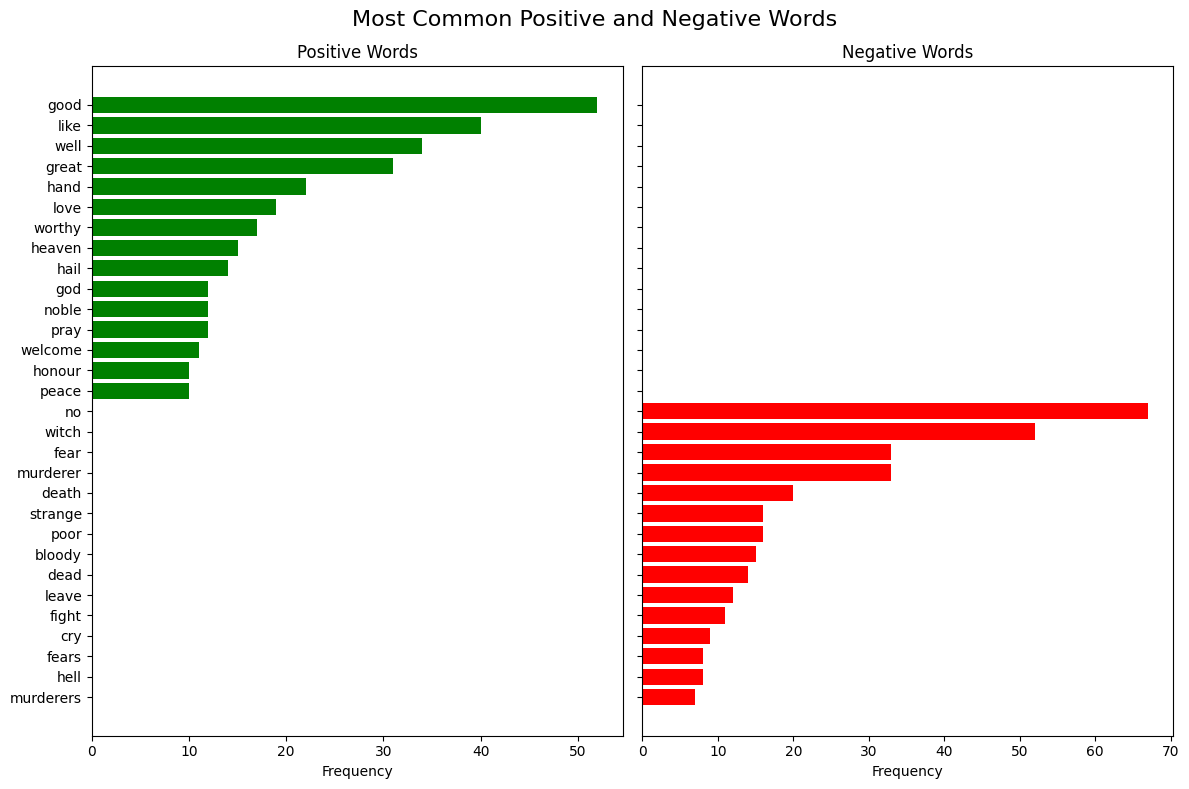

In [10]:
# get words and frequencies
pos_words, pos_counts = zip(*pos_freq)
neg_words, neg_counts = zip(*neg_freq)

fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True) # one row, two cols
fig.suptitle('Most Common Positive and Negative Words', fontsize=16)

# positive words
ax[0].barh(pos_words, pos_counts, color='green')
ax[0].set_title('Positive Words')
ax[0].set_xlabel('Frequency')
ax[0].invert_yaxis() # highest frequency on top

# negative words
ax[1].barh(neg_words, neg_counts, color='red')
ax[1].set_title('Negative Words')
ax[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

The top four positve words are similar to the MacBeth plot online, but we have the addition of "hand". We have other additional new words not present in the online plot including "god", "pray", and "no". The words are also out of order, i.e. some words occur more or less frequently in the plot above compared to the online plot. Similarly, there's an addition of "witch" in the negative words along with differing frequency values for certain words.<br><br>
These discrepancies may be accounted for by how the SentimentIntensityAnalyzer characterizes certain words that appeared in this plot and not in the online plot. We also didn't remove stopwords, hence the presence of words such as "no". Furthermore, the online plot is created using R, which means the program may have also tokenized the Macbeth text differently in Python.

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

In [11]:
macbeth_words_no_stopwords = [w for w in macbeth_words if w not in myStopWords]
print(macbeth_words_no_stopwords)
print(macbeth_words)

['cover', 'macbeth', 'william', 'shakespeare', 'contents', 'act', 'scene', 'i.', 'open', 'place', 'scene', 'ii', 'camp', 'near', 'forres', 'scene', 'iii', 'heath', 'scene', 'iv', 'forres', 'room', 'palace', 'scene', 'v.', 'inverness', 'room', 'macbethâ\x80\x99s', 'castle', 'scene', 'vi', 'castle', 'scene', 'vii', 'lobby', 'castle', 'act', 'ii', 'scene', 'i.', 'inverness', 'court', 'within', 'castle', 'scene', 'ii', 'scene', 'iii', 'scene', 'iv', 'without', 'castle', 'act', 'iii', 'scene', 'i.', 'forres', 'room', 'palace', 'scene', 'ii', 'another', 'room', 'palace', 'scene', 'iii', 'park', 'lawn', 'gate', 'leading', 'palace', 'scene', 'iv', 'room', 'state', 'palace', 'scene', 'v.', 'heath', 'scene', 'vi', 'forres', 'room', 'palace', 'act', 'iv', 'scene', 'i.', 'dark', 'cave', 'middle', 'cauldron', 'boiling', 'scene', 'ii', 'fife', 'room', 'macduffâ\x80\x99s', 'castle', 'scene', 'iii', 'england', 'kingâ\x80\x99s', 'palace', 'act', 'v', 'scene', 'i.', 'dunsinane', 'room', 'castle', 'scene

In [12]:
pos_words = []
neg_words = []

for w in macbeth_words_no_stopwords:
  if sia.polarity_scores(w)['compound'] > 0:
    pos_words.append(w)
  elif sia.polarity_scores(w)['compound'] < 0:
    neg_words.append(w)

pos_freq = FreqDist(pos_words).most_common(15)
neg_freq = FreqDist(neg_words).most_common(15)
print(pos_freq)
print(neg_freq)

[('good', 52), ('like', 40), ('well', 34), ('great', 31), ('hand', 22), ('love', 19), ('worthy', 17), ('heaven', 15), ('hail', 14), ('god', 12), ('noble', 12), ('pray', 12), ('welcome', 11), ('honour', 10), ('peace', 10)]
[('witch', 52), ('fear', 33), ('murderer', 33), ('death', 20), ('strange', 16), ('poor', 16), ('bloody', 15), ('dead', 14), ('leave', 12), ('fight', 11), ('cry', 9), ('fears', 8), ('hell', 8), ('murderers', 7), ('devil', 7)]


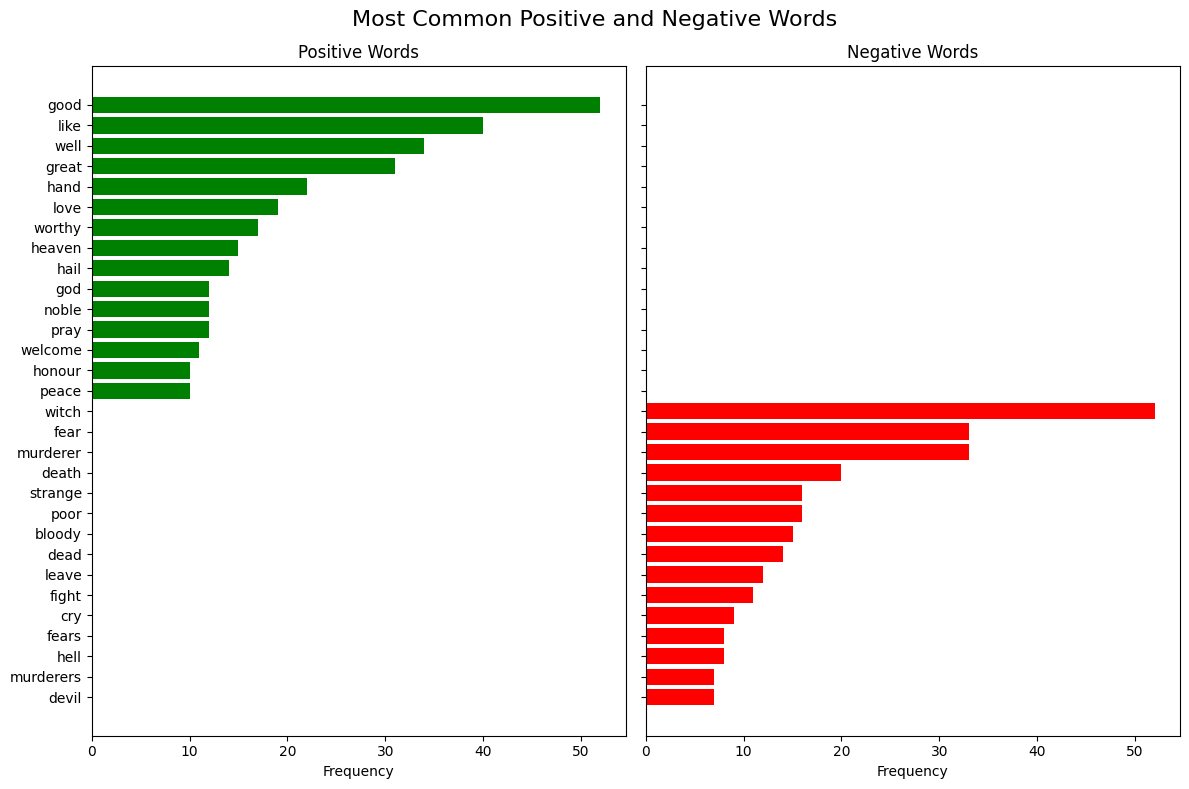

In [13]:
# separate words and frequencies
pos_words, pos_counts = zip(*pos_freq)
neg_words, neg_counts = zip(*neg_freq)

fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True) # one row, two cols
fig.suptitle('Most Common Positive and Negative Words', fontsize=16)

# positive words
ax[0].barh(pos_words, pos_counts, color='green')
ax[0].set_title('Positive Words')
ax[0].set_xlabel('Frequency')
ax[0].invert_yaxis() # highest frequency on top

# negative words
ax[1].barh(neg_words, neg_counts, color='red')
ax[1].set_title('Negative Words')
ax[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

The common occurence of "no" is removed from the list of negative words, while the rest remains the same. This denotes that the remaining words are not stopwords.

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

In [14]:
from nltk.stem.porter import PorterStemmer

In [15]:
macbeth_words_porter = [PorterStemmer().stem(w) for w in macbeth_words_no_stopwords]
print(macbeth_words_porter)

['cover', 'macbeth', 'william', 'shakespear', 'content', 'act', 'scene', 'i.', 'open', 'place', 'scene', 'ii', 'camp', 'near', 'forr', 'scene', 'iii', 'heath', 'scene', 'iv', 'forr', 'room', 'palac', 'scene', 'v.', 'inver', 'room', 'macbethâ\x80\x99', 'castl', 'scene', 'vi', 'castl', 'scene', 'vii', 'lobbi', 'castl', 'act', 'ii', 'scene', 'i.', 'inver', 'court', 'within', 'castl', 'scene', 'ii', 'scene', 'iii', 'scene', 'iv', 'without', 'castl', 'act', 'iii', 'scene', 'i.', 'forr', 'room', 'palac', 'scene', 'ii', 'anoth', 'room', 'palac', 'scene', 'iii', 'park', 'lawn', 'gate', 'lead', 'palac', 'scene', 'iv', 'room', 'state', 'palac', 'scene', 'v.', 'heath', 'scene', 'vi', 'forr', 'room', 'palac', 'act', 'iv', 'scene', 'i.', 'dark', 'cave', 'middl', 'cauldron', 'boil', 'scene', 'ii', 'fife', 'room', 'macduffâ\x80\x99', 'castl', 'scene', 'iii', 'england', 'kingâ\x80\x99', 'palac', 'act', 'v', 'scene', 'i.', 'dunsinan', 'room', 'castl', 'scene', 'ii', 'countri', 'near', 'dunsinan', 'scen

In [16]:
pos_words = []
neg_words = []

for w in macbeth_words_porter:
  if sia.polarity_scores(w)['compound'] > 0:
    pos_words.append(w)
  elif sia.polarity_scores(w)['compound'] < 0:
    neg_words.append(w)

pos_freq = FreqDist(pos_words).most_common(15)
neg_freq = FreqDist(neg_words).most_common(15)
print(pos_freq)
print(neg_freq)

[('good', 54), ('like', 40), ('well', 34), ('hand', 34), ('great', 34), ('love', 25), ('heaven', 17), ('friend', 15), ('honour', 14), ('hail', 14), ('grace', 13), ('thank', 13), ('god', 12), ('hope', 12), ('pray', 12)]
[('witch', 58), ('murder', 50), ('fear', 42), ('death', 20), ('poor', 16), ('dead', 14), ('die', 13), ('fight', 12), ('shake', 9), ('doubt', 8), ('hell', 8), ('sorrow', 8), ('devil', 7), ('harm', 7), ('grave', 7)]


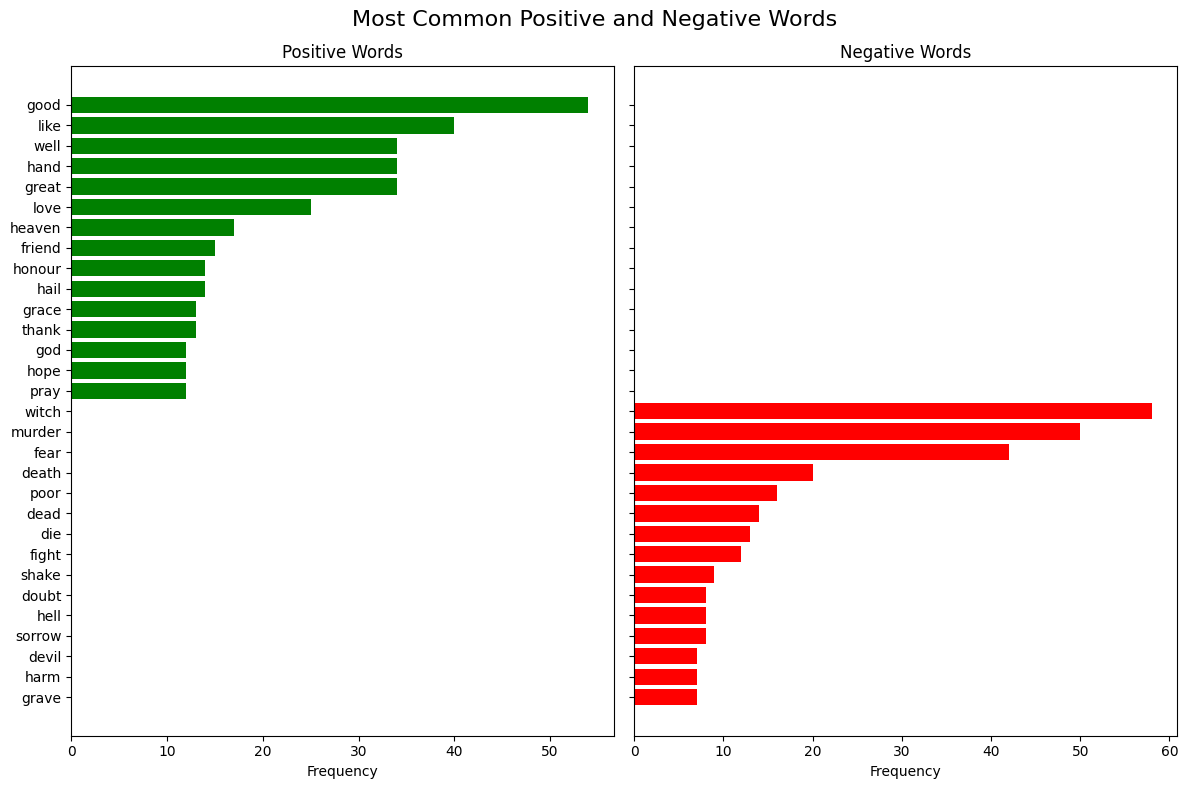

In [17]:
# get words and frequencies
pos_words, pos_counts = zip(*pos_freq)
neg_words, neg_counts = zip(*neg_freq)

fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True) # one row, two cols
fig.suptitle('Most Common Positive and Negative Words', fontsize=16)

# positive words
ax[0].barh(pos_words, pos_counts, color='green')
ax[0].set_title('Positive Words')
ax[0].set_xlabel('Frequency')
ax[0].invert_yaxis() # highest frequency on top

# negative words
ax[1].barh(neg_words, neg_counts, color='red')
ax[1].set_title('Negative Words')
ax[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

There's more occurences of "witch", "murder", "fear", "good", "like", "well", and so on. "worthy" is completely removed from the top 15 list, and other similar changes are present as well.

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):

![image.png](attachment:image.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Sum the compound sentiment scores of every word in the scene (using VADER's SentimentIntensityAnalyser's polarity_scores method to get the compound sentiment score for each word).
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

[-0.516, 0.43900000000000056, 13.3498, 14.6818, 5.0405, 19.468300000000013, 4.3679000000000014, 32.32180000000001, 16.769399999999997, 18.279700000000002, 14.039300000000003, 7.3309000000000015, -2.577499999999998, -11.169199999999996, -2.2933999999999783, 5.206400000000001, 10.786100000000005, 3.0986, 4.3607000000000005, -6.2979, 0.3249000000000001, -12.149999999999986, -6.784099999999999, -2.7154000000000003, -33.85569999999997]


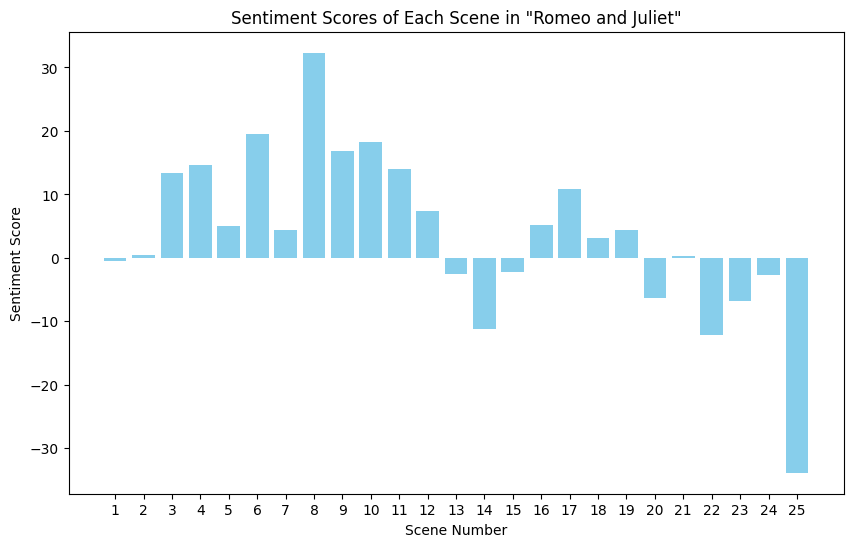

In [18]:
scene_sentiments = [] # sentiments for each scene

for scene in r_j_scenes:
    words = word_tokenize(scene)
    scene_sentiment = sum(sia.polarity_scores(word)['compound'] for word in words)
    scene_sentiments.append(scene_sentiment)

print(scene_sentiments)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(scene_sentiments) + 1), scene_sentiments, color='skyblue') # scene vs sentiment score
plt.xlabel('Scene Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores of Each Scene in "Romeo and Juliet"')
plt.xticks(range(1, len(scene_sentiments) + 1))  # x-ticks match scene numbers
plt.show()

The online plot shows the sentiment during each scene over time by analyzing chunks within a scene, whereas the plot above shows the overall sentiment of a scene. For example, the online plot shows an even variability between positive and negative sentiments within scene 1; hence, the plot above has a sentiment score close to 0 as the negative and positive scores cancel each other out.

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

[-1, -18, 31, 28, 10, 40, 9, 56, 37, 41, 30, 17, 1, -26, -4, 11, 27, 2, 13, -14, 2, -23, -14, -6, -75]


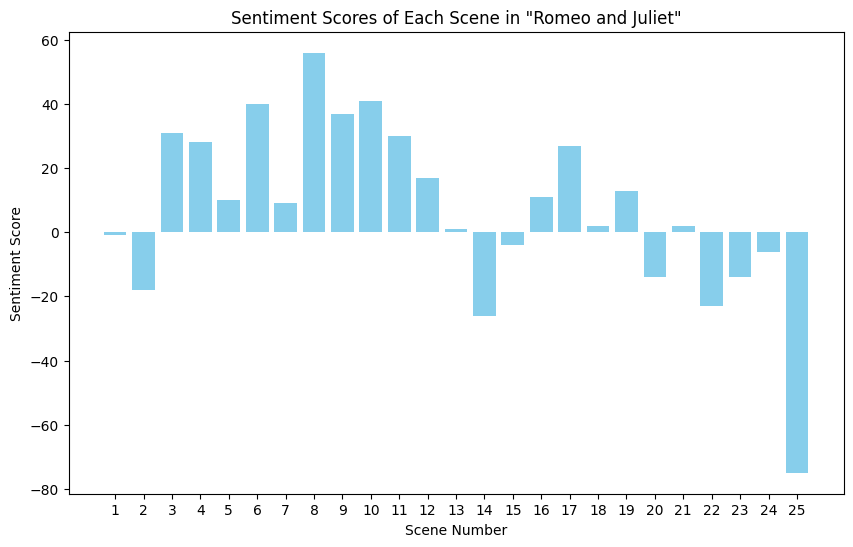

In [19]:
scene_sentiments = [] # sentiments for each scene

for scene in r_j_scenes:
    words = word_tokenize(scene)
    total_score = 0
    for word in words:
      if sia.polarity_scores(word)['compound'] > 0:
        total_score += 1
      if sia.polarity_scores(word)['compound'] < 0:
        total_score -= 1
    scene_sentiments.append(total_score)

print(scene_sentiments)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(scene_sentiments) + 1), scene_sentiments, color='skyblue') # scene vs sentiment score
plt.xlabel('Scene Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores of Each Scene in "Romeo and Juliet"')
plt.xticks(range(1, len(scene_sentiments) + 1))  # x-ticks match scene numbers
plt.show()

The sentiment scores have become more intense as seen by the larger scale on the y-axis. For example, scene 8 had a sentiment score of over 30 in the first plot, but now has a score of nearly 60. Scene 25 had a sentiment score of below -30, but now has a score of nearly -80.

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [20]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [21]:
testword = 'ridiculous'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

ridiculous is negative


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

[-7, -5, 11, 10, -19, 21, -1, 25, 20, 24, 15, 11, -37, -33, -31, 12, 4, -21, 8, -18, -3, -30, -28, -2, -88]


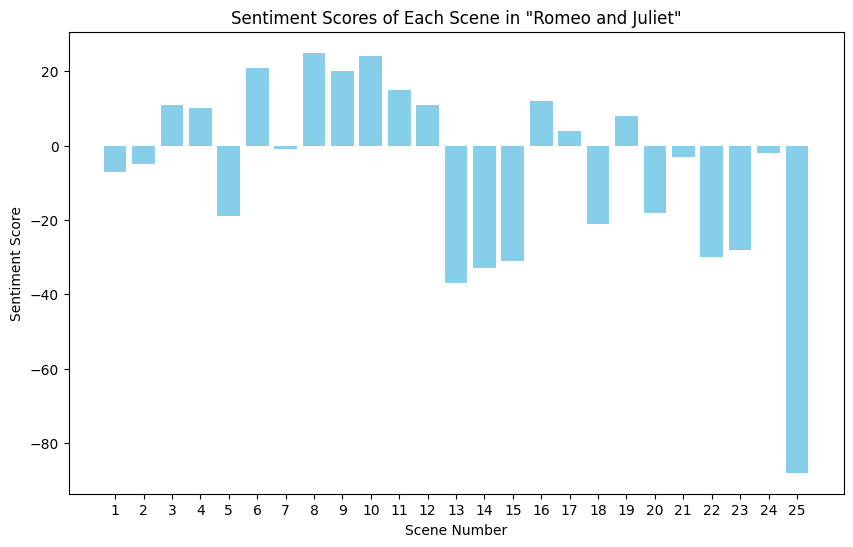

In [22]:
scene_sentiments = [] # sentiments for each scene

for scene in r_j_scenes:
    words = word_tokenize(scene)
    total_score = 0
    for word in words:
      if word in positive_words:
        total_score += 1
      if word in negative_words:
        total_score -= 1
    scene_sentiments.append(total_score)

print(scene_sentiments)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(scene_sentiments) + 1), scene_sentiments, color='skyblue') # scene vs sentiment score
plt.xlabel('Scene Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores of Each Scene in "Romeo and Juliet"')
plt.xticks(range(1, len(scene_sentiments) + 1))  # x-ticks match scene numbers
plt.show()

The sentiment scores are more negative as seen by the decrease in scores across all scenes.

Plot 2: [-1, -18, 31, 28, 10, 40, 9, 56, 37, 41, 30, 17, 1, -26, -4, 11, 27, 2, 13, -14, 2, -23, -14, -6, -75]

Plot 3: [-7, -5, 11, 10, -19, 21, -1, 25, 20, 24, 15, 11, -37, -33, -31, 12, 4, -21, 8, -18, -3, -30, -28, -2, -88]


Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

[-4, -11, -11, -7, 8, 11, 12, -6, 1, -5, 19, -7, -16, 8, -3, 5, 2, 3, -4, 15, 4, 3, 6, 5, 9, 12, -4, 7, 8, 7, -2, 4, -14, -11, -9, -16, -15, -28, -8, -10, 11, 7, -7, -20, 9, 6, 3, -4, -14, -4, 9, -20, -3, -32, -1, 3, -9, -22, -12, -16, -4, -11, -20, -17, -5]


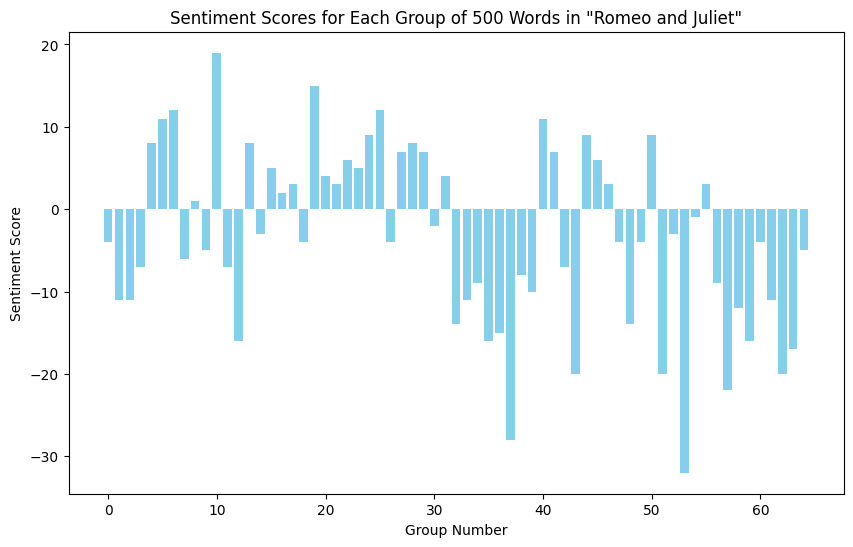

In [23]:
group_size = 500
sentiment_scores = [] # sentiments for each batch

words = word_tokenize(r_j_string)
for i in range(0, len(words), group_size):
  grp_words = words[i:i + group_size]
  total_score = 0
  for word in grp_words:
    if word in positive_words:
      total_score += 1
    if word in negative_words:
      total_score -= 1
  sentiment_scores.append(total_score)

print(sentiment_scores)
plt.figure(figsize=(10, 6))
plt.bar(range(len(sentiment_scores)), sentiment_scores, color='skyblue')
plt.xlabel('Group Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores for Each Group of 500 Words in "Romeo and Juliet"')
plt.show()

This plot more closely resembles the online plot as it shows the gradual change in sentiment over the text instead of the overall sentiment of a particular scene.

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

I would use the fourth method to report on the evolution of sentiment in Romeo & Juliet because a scene will have different emotions and different actions that can impact the score. Calculating the overall sentiment of a scene isn't as accurate as calculating the sentiment over batches of words since the latter can express more information on how the mood changes within a scene. For example, the play starts with a negative sentiment but transitions to a really positive sentiment before decreasing to a negative sentiment all within scene 1.